ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

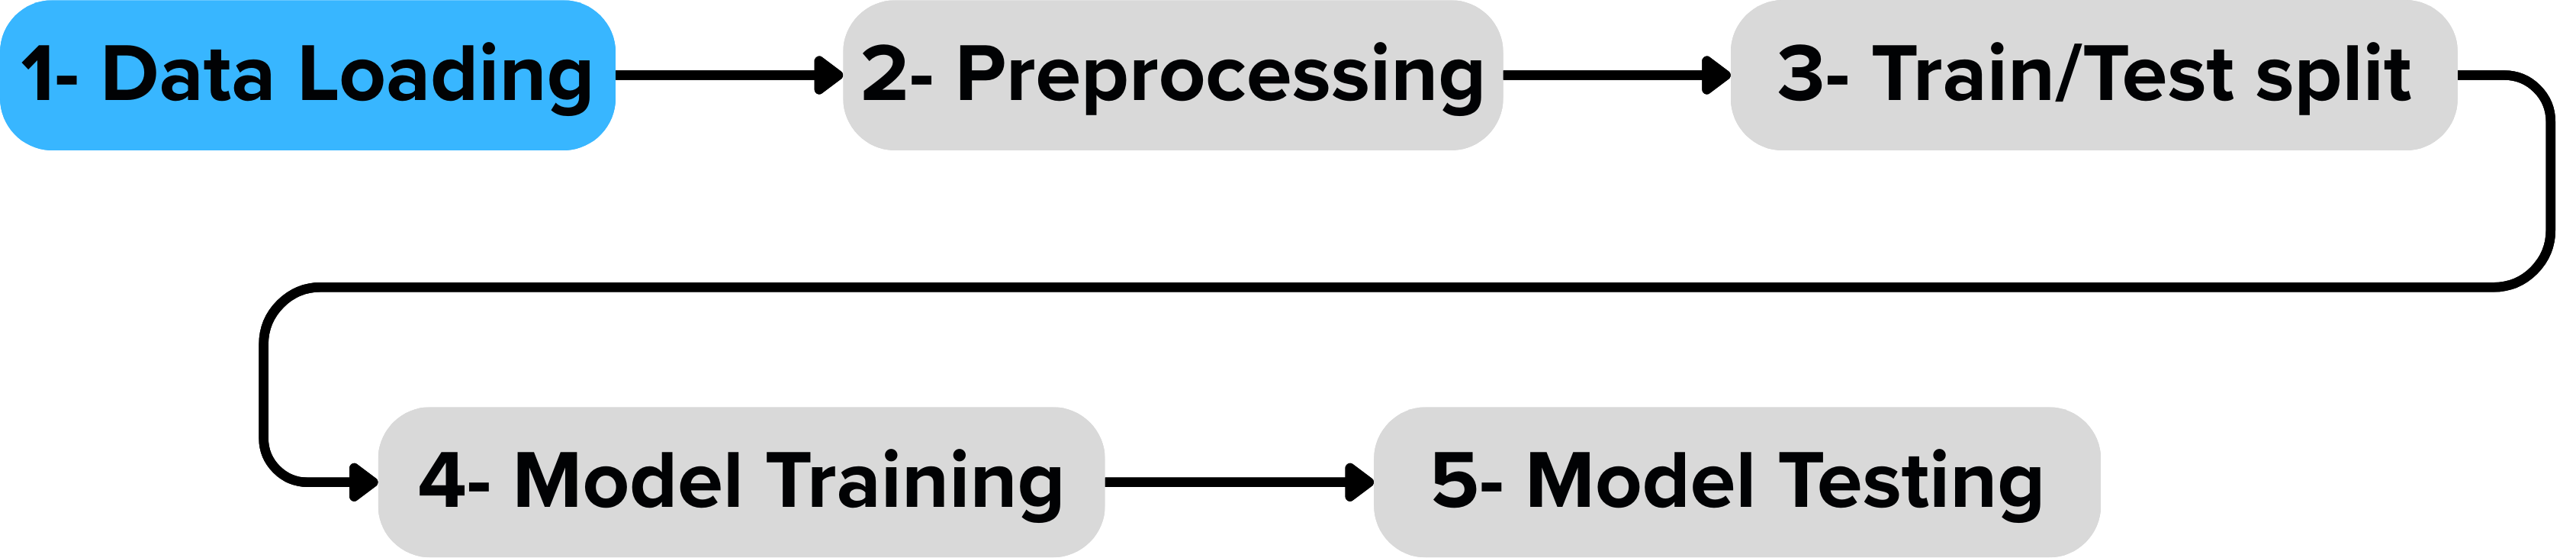

In [10]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [11]:
# Load Dataset

df = pd.read_csv("kc_house_data.csv")

# Display first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Check Missing Values

In [12]:
# Check all values
print(df.isna())

          id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0       False       False  False  ..

In [13]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### Check duplicate rows

In [14]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [15]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (21613, 21) 

number of rows:  21613
number of columns:  21


### Data type of columns

In [16]:
# viewing the data types of columns
df.dtypes

id                 int64
date                 str
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
df['date'] = pd.to_datetime(df['date'])

print(df.dtypes)

id                        int64
date             datetime64[us]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


### Descriptive summary Statistics

In [18]:
# Statistical summary
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


### Univariate Analysis
### sqft_living

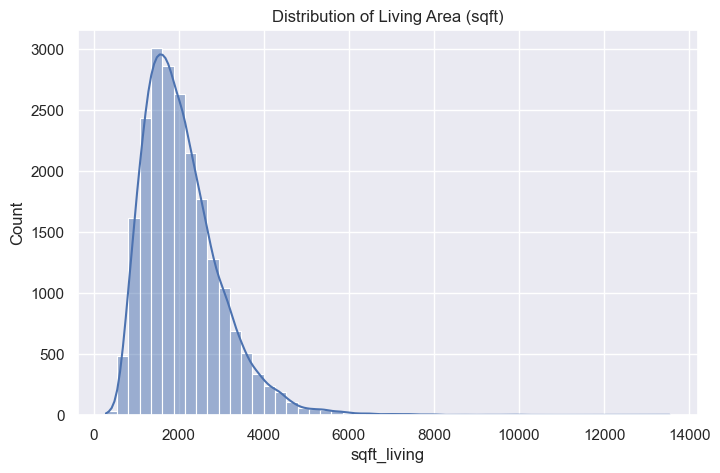

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['sqft_living'], bins=50, kde=True)
plt.title("Distribution of Living Area (sqft)")
plt.show()

- Shows how house living area sizes are distributed
- Right skew = many medium-sized houses, few very large luxury mansions

### Distribution of House Prices

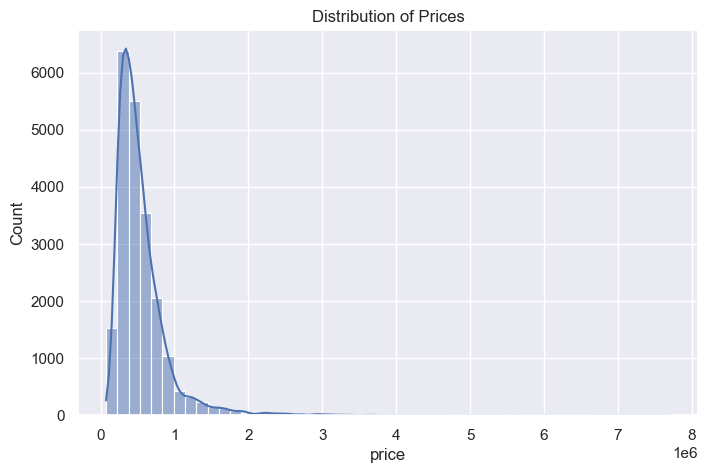

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Prices")
plt.show()

## Bivariate Analysis

### Price by Grade

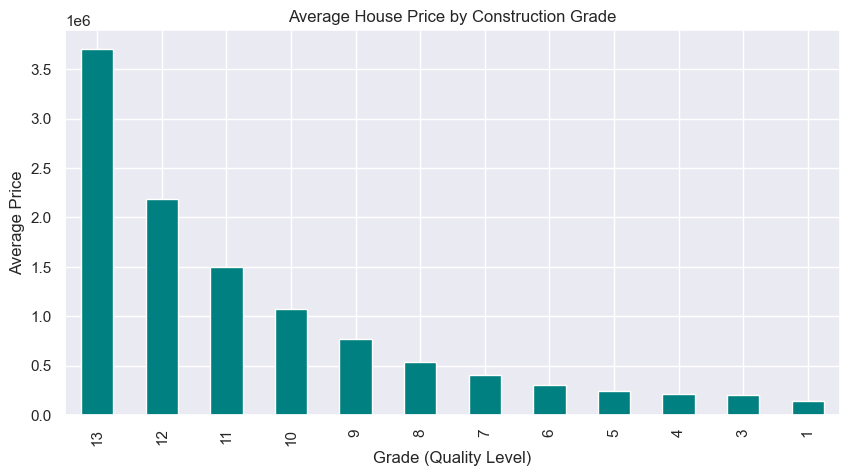

In [21]:
grade_price = df.groupby('grade')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
grade_price.plot(kind='bar', color='teal')
plt.title("Average House Price by Construction Grade")
plt.xlabel("Grade (Quality Level)")
plt.ylabel("Average Price")
plt.show()

### Price by Bedrooms

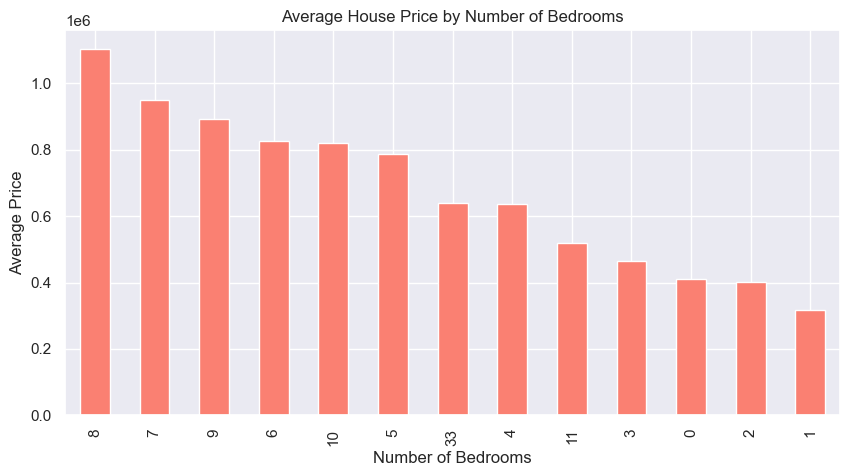

In [22]:
bedroom_price = df.groupby('bedrooms')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
bedroom_price.plot(kind='bar', color='salmon')
plt.title("Average House Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.show()

### Average Price by Location (Top 10)

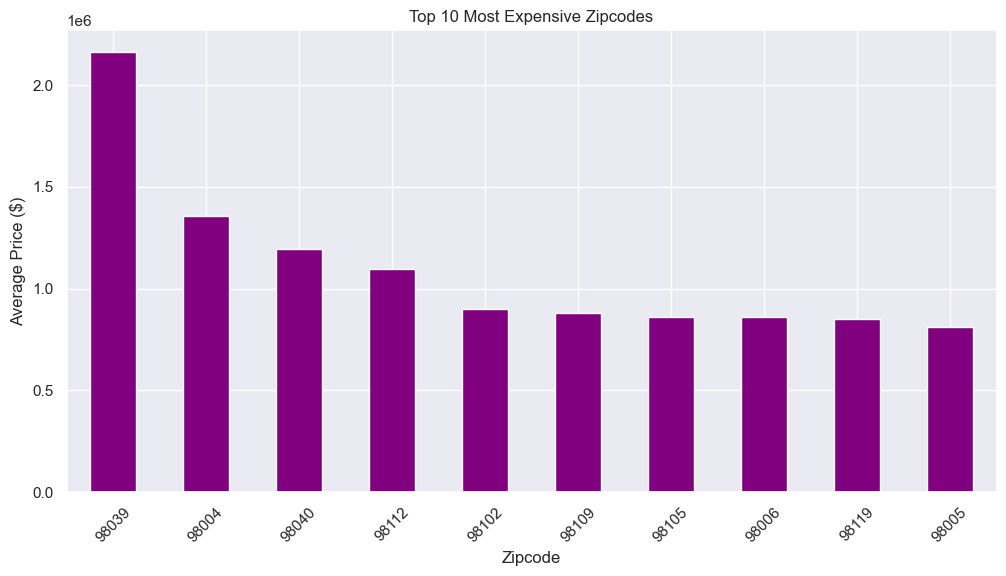

In [23]:
zip_price = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
zip_price.plot(kind='bar', color='purple')
plt.title("Top 10 Most Expensive Zipcodes")
plt.xlabel("Zipcode")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)

plt.show() 

### Living Area vs Price Relationship

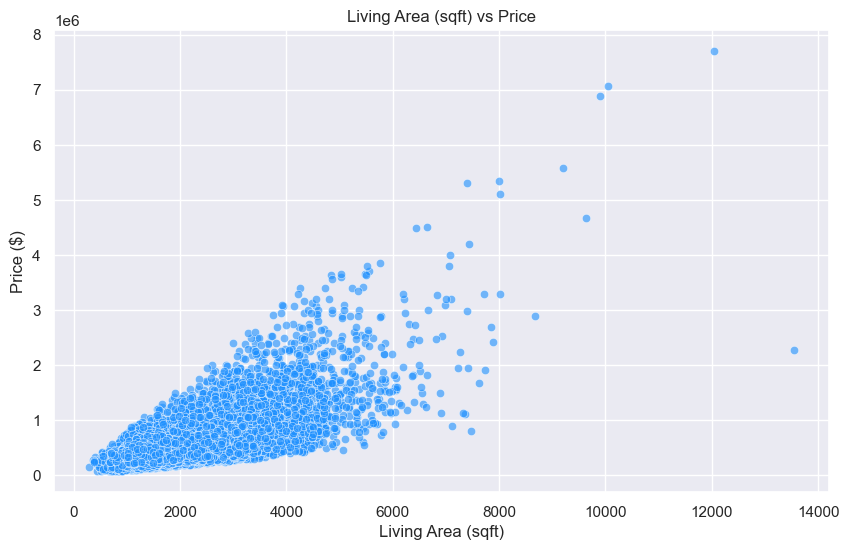

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6, color='dodgerblue')
plt.title("Living Area (sqft) vs Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price ($)")
plt.show()

### Feature Correlation Matrix

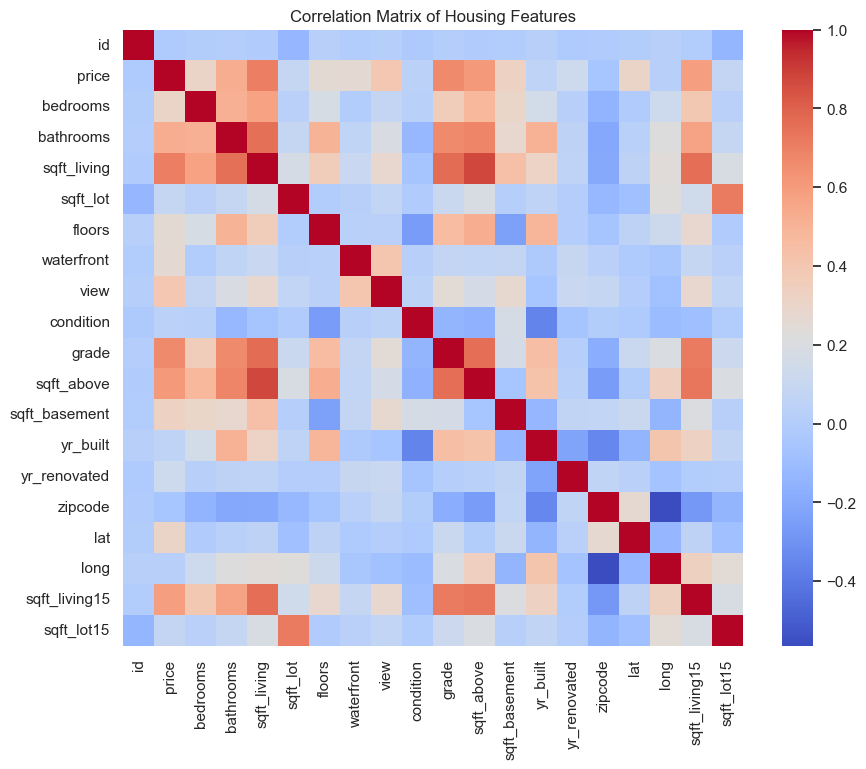

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Housing Features")
plt.show()

- Shows the correlation strength between different features
- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Average Price Trend

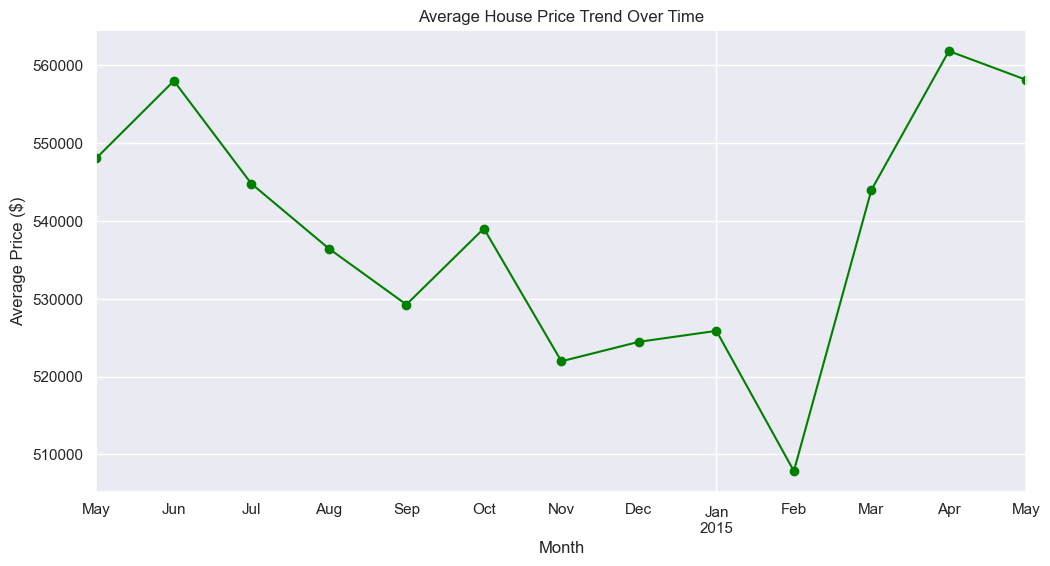

In [26]:
df['month_year'] = df['date'].dt.to_period('M')
monthly_trend = df.groupby('month_year')['price'].mean()

plt.figure(figsize=(12,6))
monthly_trend.plot(marker='o', color='green')
plt.title("Average House Price Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.